# Problem statement

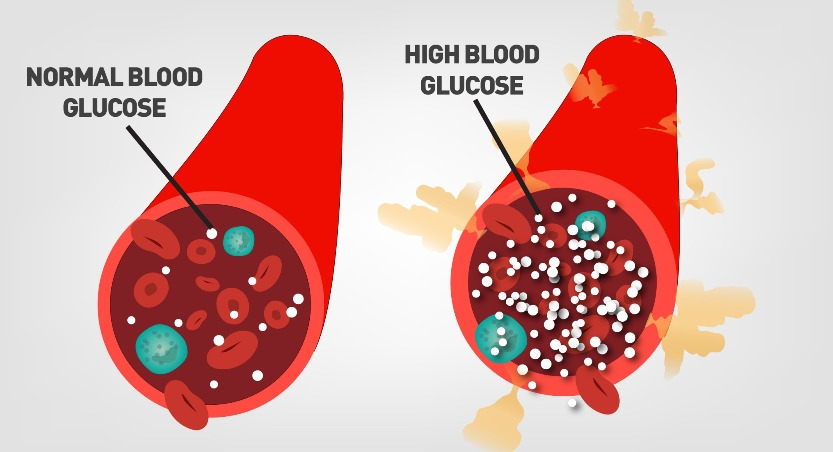

**Research Questions on Diabetes Prediction Using BRFSS Data**

1. **Prediction Accuracy:** Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
   
2. **Identifying Risk Factors:** What risk factors are most predictive of diabetes risk?
   
3. **Feature Subset Evaluation:** Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
   
4. **Short Form Development:** Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

# Data collection

**Diabetes** is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. The Behavioral Risk Factor Surveillance System (BRFSS) is a **health-related telephone** survey that is collected **annually by the CDC(The Centers for Disease Control)**.

# Data exploration and preprocessing

## Retrieving Data 

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import os
from scipy.stats import chi2_contingency

In [3]:
os.chdir('Dataset')

In [4]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [5]:
# Number of rows
print(df.shape[0])

# Column names
print(df.columns.tolist())

# Data types
print(df.dtypes)

253680
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: ob

## **Understanding our data**

We can find more information about the features and types using the `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

According to the output above, we have **253680 entries**, 0 to 253680, as well as 22 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 253680 then there is no missing values for that particular feature. 'Diabetes_binary' is our target or response variable and the rest of the features are our predictor variables.

### Understand Features 

1. `Diabetes_binary`: **This features could be in integer format**
    * 1: Diabetic
    * 0: Non-Diabetic 
2. `HighBP`: **Int format**
    * 1: High blood pressure 
    * 0: Not high blood pressure
3. `Highcol`: **Int format**
    * 1: High cholesterol
    * 0: Not High cholesterol
4. `CholCheck`: Have you ever checked cholesterol within 5 year? **Int format**
    * 1: Yes
    * 0: No
5. `BMI`: The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy. **Int fomat**.
6. `Smoker`: Have you smoked at least 100 cigarettes in your entire life? **Note: 5 packs = 100 cigarettes**
    * 1: Yes
    * 0: No
7. `Stroke`: Had you ever told a sroke? **Int format**
    * 1: Yes
    * 0: No
    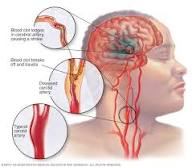
    A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts
8. `HeartDiseaseorAttack`: coronary heart disease (CHD) or my ocardial infarction (MI)
    * 1: yes
    * 0: No
9. `PhysActivity`: physical activity in past 30 days
    * 1: Yes
    * 0: No
10. `Fruits`: Consume Fruit 1 or more tmes per day
    * 1: Yes
    * 0: No
11. `veggies`: Comsume Vegetables
    * 1: Yes
    * 0: No
12. `HvyAlcoholConsump` Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
    * 1: Yes
    * 0: No
    
    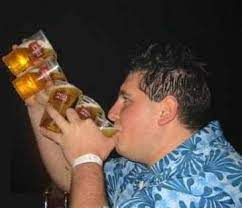
 13. `AnyHealthcare`: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
     * 1: Yes
     * 0: No
     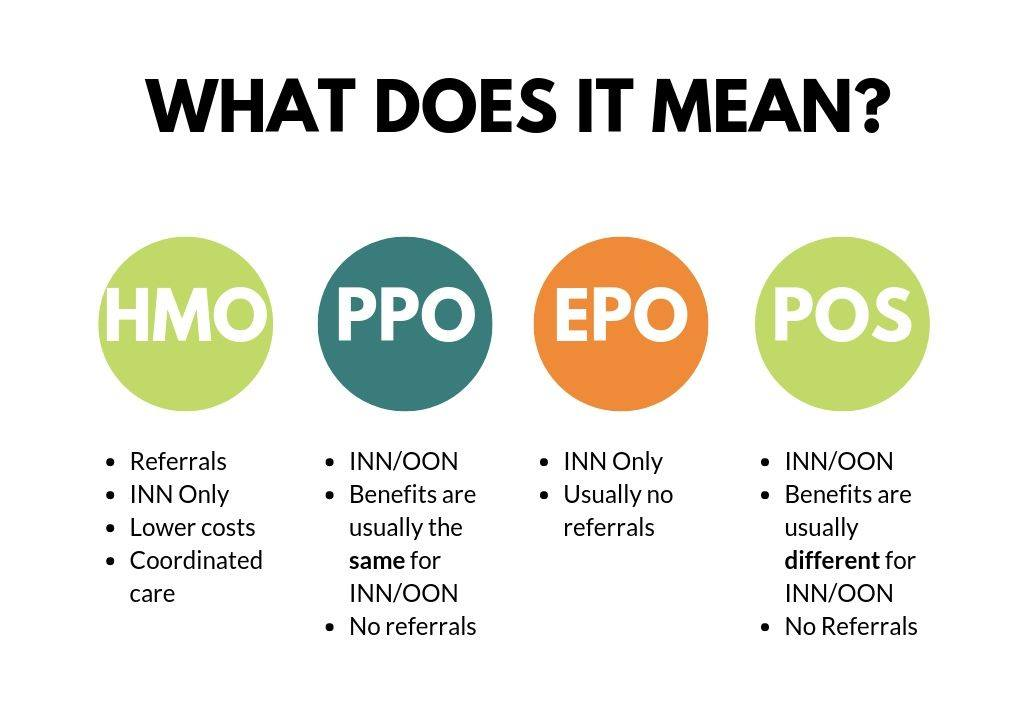
     
14. `NoDocbcCost`: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
    * 1: Yes
    * 0: No
15. `GenHlth`: Would you say that in general your health is? Scale 1 to 5
    * 1: Excellent
    * 2: very good
    * 3: Good
    * 4: fair
    * 5: Poor
16. `MentHlth`: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for now.

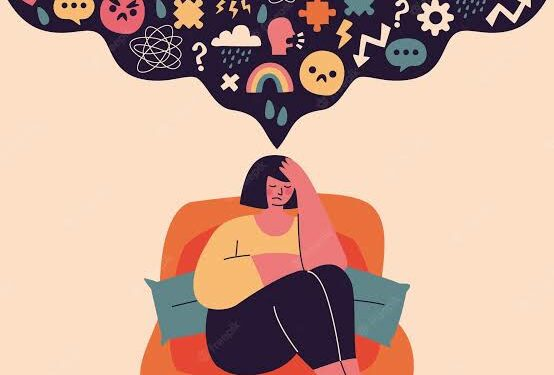

17. `PhyHlth`: now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days.

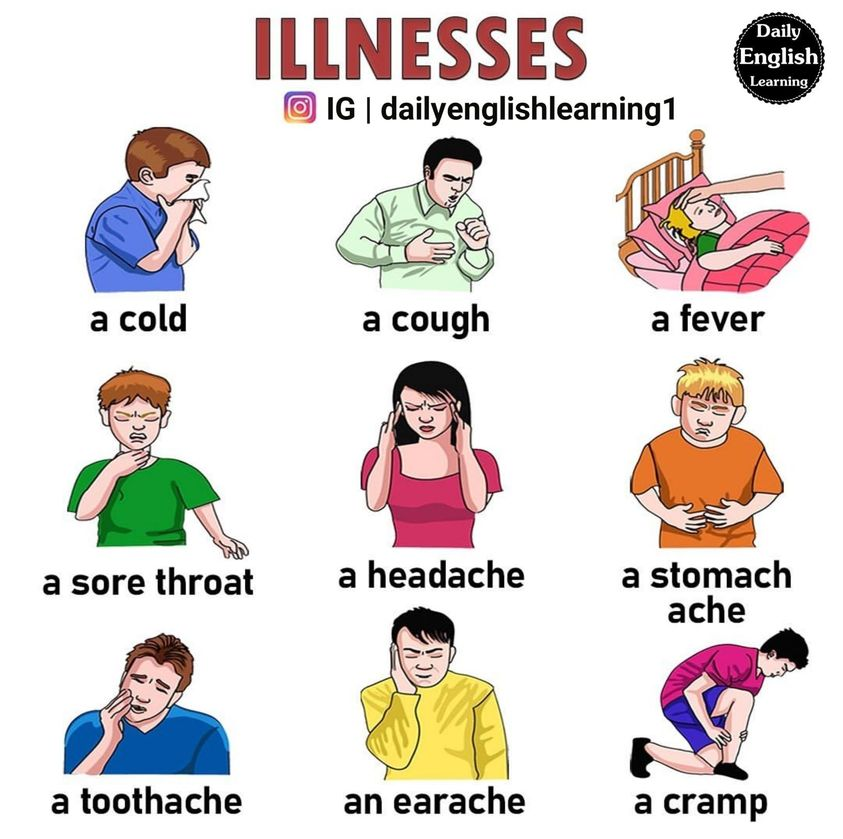

18. `DiffWalk`: Do you have serious difficalty walking or climbing stairs?
    * 1: Yes
    * 0: No
   
   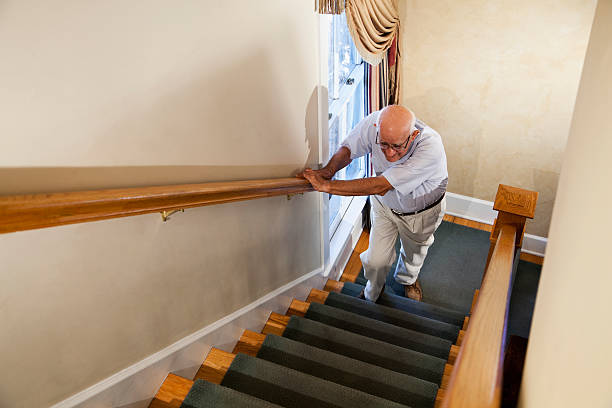
   
19. `Sex`: Gender
    * 1: Male
    * 0: Female
20. `Age`: 13-level age category 
    * 1: 18-24
    * 2: 25-29
    * 3: 30-34
    * 4: 35-39
    * 5: 40-44
    * 6: 45-49
    * 7: 50-54
    * 8: 55-54
    * 9: 60-64
    * 10: 65-64
    * 11: 65-69
    * 12: 75-79
    * 13: 80 or older
21. `Education`: Education level scale 1-6
    * 1: Never attended school or only kindergarten
    * 2: Grades 1 through 8 or Elementary
    * 3: Junior High School
    * 4: Senior High School
    * 5: Undergraduate Degree
    * 6: Magister
22. `Income`: Income scale scale 1 thoght 8
    * 1: less than \\$10, 000
    * 2: less than \\$16, 000
    * 3: less than \\$22, 000
    * 4: less than \\$18, 000
    * 5: less than \\$35, 000
    * 6: less than \\$52, 000
    * 7: less than \\$70, 000
    * 8: \\$75, 000 or more

In [7]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = df.describe()
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
mean           0.139333  0.429001  0.424121    0.96267  28.382364  0.443169   
25%            0.000000  0.000000  0.000000    1.00000  24.000000  0.000000   
median         0.000000  0.000000  0.000000    1.00000  27.000000  0.000000   
75%            0.000000  1.000000  1.000000    1.00000  31.000000  1.000000   
range          1.000000  1.000000  1.000000    1.00000  86.000000  1.000000   

          Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
mean    0.040571              0.094186      0.756544  0.634256  ...   
25%     0.000000              0.000000      1.000000  0.000000  ...   
median  0.000000              0.000000      1.000000  1.000000  ...   
75%     0.000000              0.000000      1.000000  1.000000  ...   
range   1.000000              1.000000      1.000000  1.000000  ...   

        AnyHealthcare  NoDocbcCost   GenHlth   MentHlth   PhysHlth  DiffWalk  \
mean         0.951053     0.084177  2.511392   3.184772   4.242081  0.168224   
25%          1.000000     0.000000  2.000000   0.000000   0.000000  0.000000   
median       1.000000     0.000000  2.000000   0.000000   0.000000  0.000000   
75%          1.000000     0.000000  3.000000   2.000000   3.000000  0.000000   
range        1.000000     1.000000  4.000000  30.000000  30.000000  1.000000   

             Sex        Age  Education    Income  
mean    0.440342   8.032119   5.050434  6.053875  
25%     0.000000   6.000000   4.000000  5.000000  
median  0.000000   8.000000   5.000000  7.000000  
75%     1.000000  10.000000   6.000000  8.000000  
range   1.000000  12.000000   5.000000  7.000000  

[5 rows x 22 columns]

### Preprocessing 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
transform_to_integer = lambda x: int(x) if not pd.isna(x) and np.isfinite(x) else x

for col in df.columns:
    df[col] = df[col].apply(transform_to_integer)

Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.

In [10]:
df['Diabetes_binary'].describe()

count    253680.000000
mean          0.139333
std           0.346294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes_binary, dtype: float64

The summary indicates that most entries are 0 (no diabetes), with a mean of approximately 0.139333, suggesting diabetes occurs in about 13.93% of cases. The data is imbalanced, skewed towards non-diabetic instances. There's a notable difference between minimum value and quartiles, hinting at non-normal distribution, important for analyses like linear regression. Checking for normality, possibly through log transformation, becomes crucial.

# Imbalance Dataset

Imbalanced data is a common problem in machine learning, which brings challenges to feature correlation, class separation and evaluation, and results in poor model performance. Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

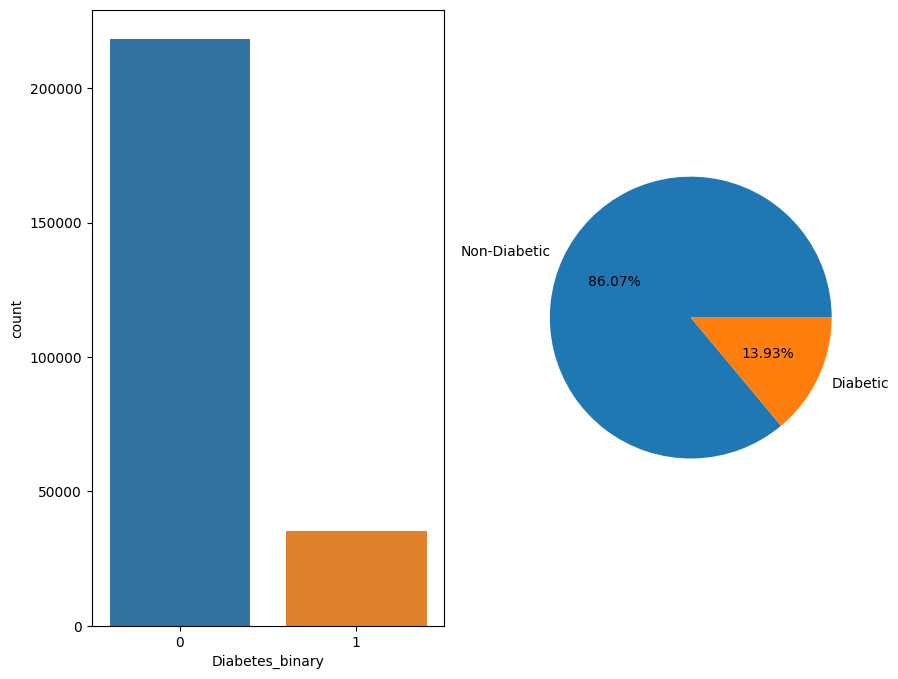

In [11]:
# Checking the value count of Diabetes_binary_str by using countplot

figure1, plot1 = plt.subplots(1, 2, figsize = (10, 8))

sns.countplot(x = df['Diabetes_binary'], ax=plot1[0])

# Checking diabetic and non diabetic average by pie

labels = ['Non-Diabetic', 'Diabetic']

plt.pie(df['Diabetes_binary'].value_counts(), labels = labels, autopct='%.02f%%');

As we can see, the pie chart shows that the proportion of diabetics is around 14%, while non-diabetics constitute 86%, leading to an imbalance that could be problematic.

### These issues could be mitigated at one of the following:

* **Model-level:** Models can be modified to introduce heavier weighting to smaller representative classes, penalising more heavily errors in training prediction;
* **Evaluation-level:** Alternative evaluation metrics must be used to account for class balance – note that this solves only the problem of performance evaluation, it does not actually lead to better model classification.
* **Data-level:** Alternatively, the data itself can be transformed! If done in a smart way, new instances can be introduced in such a way to allow models to better model these classes. These methods fall under the name of data samplers, and are the topic of discussion for the next section.

### There are several approaches to solving class imbalance problem before starting classification, such as:

* More samples from the minority class(es) should be acquired from the knowledge domain.

* Changing the loss function to give the failing minority class a higher cost.

* Oversampling the minority class.

* Undersampling the majority class.

* Any combination of previous approaches.

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. Oversampling is the most often used approach (but not necessarily the best).

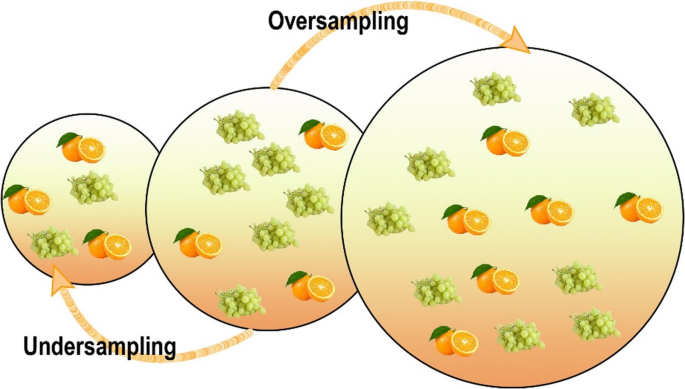

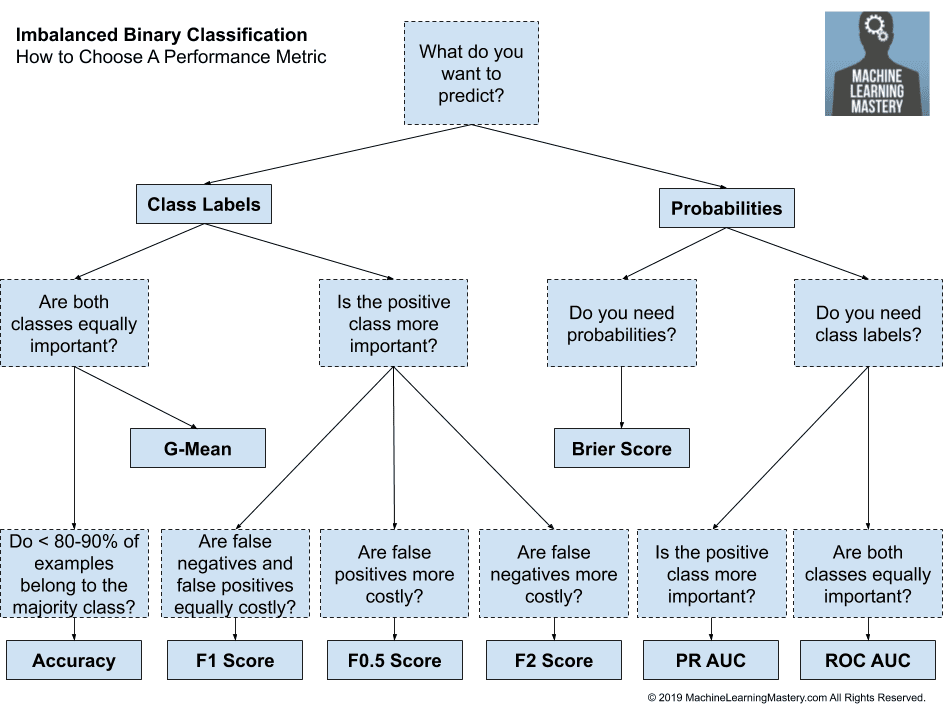

## Data Cleaning 

### **Handling the Duplicates**

Having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function.

In [12]:
duplicates = df[df.duplicated()]
print("Total Duplicates rows observed:", duplicates.shape[0])
print("Dropping duplicates - If each field is exactly same as this wont add any value to the model")

# Dropping duplicates
print("Shape before dropping duplicates : ", df.shape[0])
df.drop_duplicates(inplace = True)
print("Shape after dropping duplicates : ", df.shape[0])

Total Duplicates rows observed: 24206
Dropping duplicates - If each field is exactly same as this wont add any value to the model
Shape before dropping duplicates :  253680
Shape after dropping duplicates :  229474


### **Handling the Missing Values**

For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


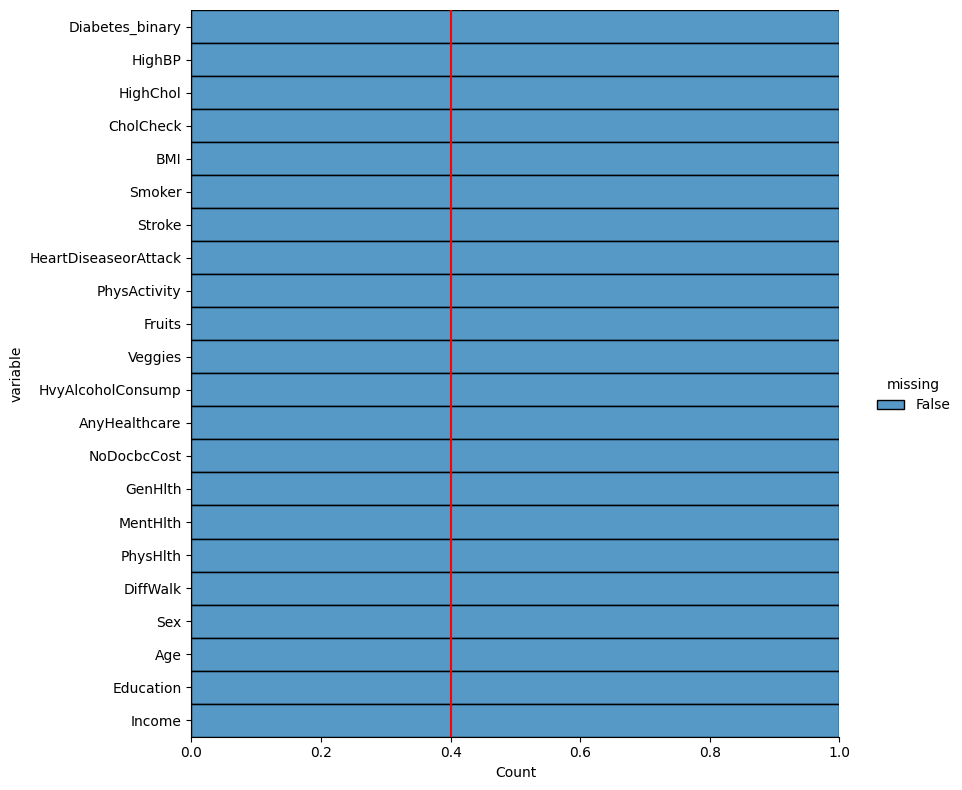

In [13]:
import seaborn as sns

sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r');

In [14]:
# Funtion to check the missing value count and percentage   
def missing_val_check(data):
    """
    Input::data - A pandas dataframe
    Output::Missing value report by column
    """
    # Missing data check
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent * 100], axis=1, keys=["Total", "Percent(%)"]
    )
    return missing_data

In [15]:
# Converting blank spaces to null to capture the duplicates from our data
#diab.replace(r"^\s*$", np.nan, regex=True, inplace=True)

missing_val_check(df)

if missing_val_check(df)['Total'].sum() == 0:
    print("No Missing Value found")

No Missing Value found


### **Handling the Outliers** 

#### Finding the Outliers

In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### Uni-variate Analysis

A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).

Here, we will use a box plot for the features exclude binary features.

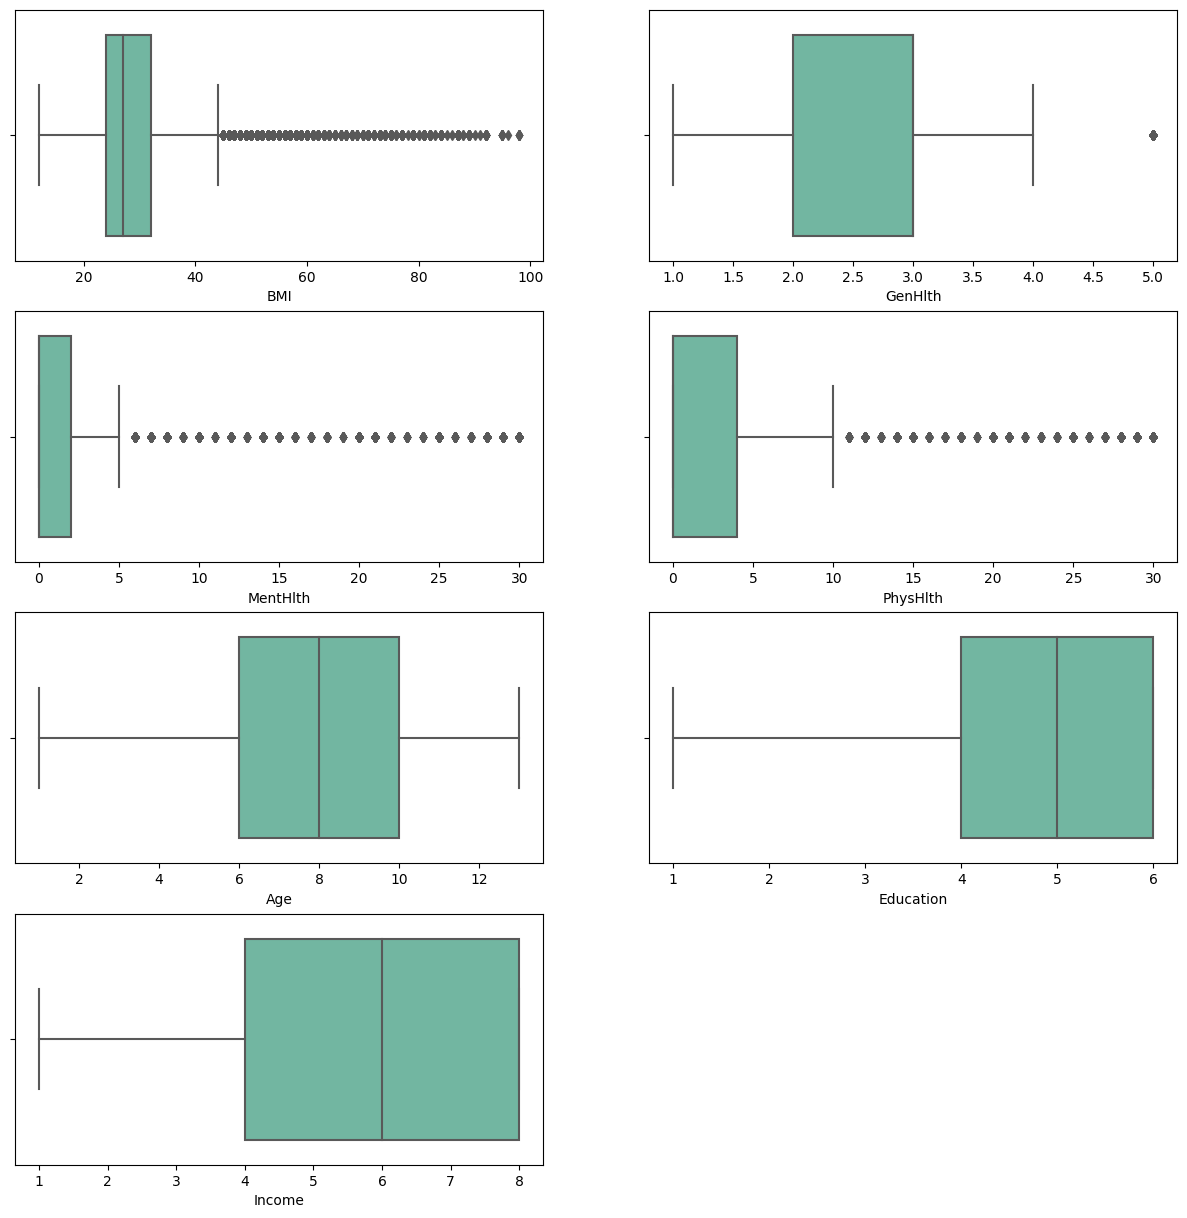

In [16]:
plt.figure(figsize=(15, 15))
for i, col in enumerate([col for col in df.columns if df[col].value_counts().shape[0] > 2]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = col, data = df, palette = 'Set2')
plt.show()

As we can see from these fours plots, we have some points that are plotted outside the box plot area and that greatly diviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'BMI', 'GenHlth', 'MentHlth', and 'PhysHlth' might be the actual true data points and do not need to removed.

### **Bi-variate Analysis** 

Next, we will look at the bi-variate analysis of the paire features, the 'BMI', 'GenHlth', 'MentHlth', and 'PhysHlth' paire with 'Diabetes_binary', and plot the box plot of the relationship between these two parameters.

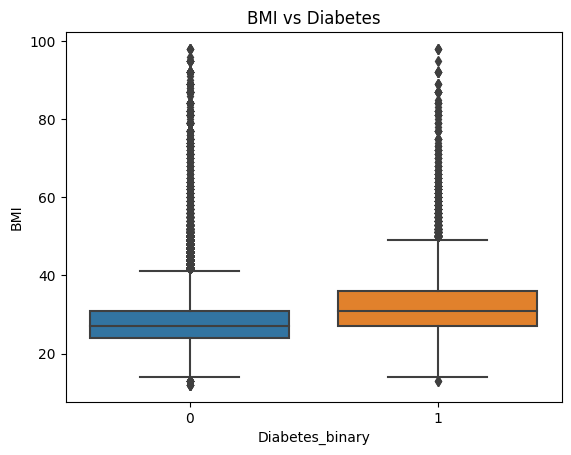

In [17]:
sns.boxplot(x = 'Diabetes_binary', y = 'BMI', data = df)
plt.title('BMI vs Diabetes')
plt.show()

The box plot analysis shows differences between non-diabetic and diabetic individuals in terms of BMI distribution. For non-diabetic individuals, most BMI values are clustered around the median, but there are a few outliers indicating higher BMI values. However, diabetic individuals have a wider spread of BMI values, suggesting more variation among them.

In simpler terms, non-diabetic individuals generally have similar BMI values, with only a few outliers, while diabetic individuals have more diverse BMI values, indicating a wider range of body weights within this group.

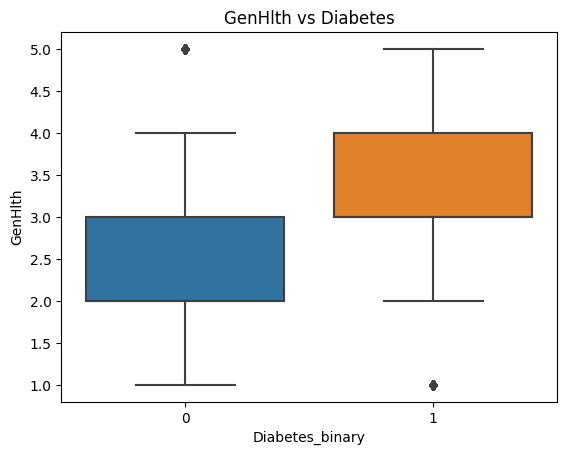

In [18]:
sns.boxplot(x = 'Diabetes_binary', y = 'GenHlth', data = df)
plt.title('GenHlth vs Diabetes')
plt.show()

As a result of examining the relationship between GenHlth and diabetes, we observe only one outlier point in the box plot. Interestingly, neither diabetic nor non-diabetic individuals show a clear median value within the box plot.

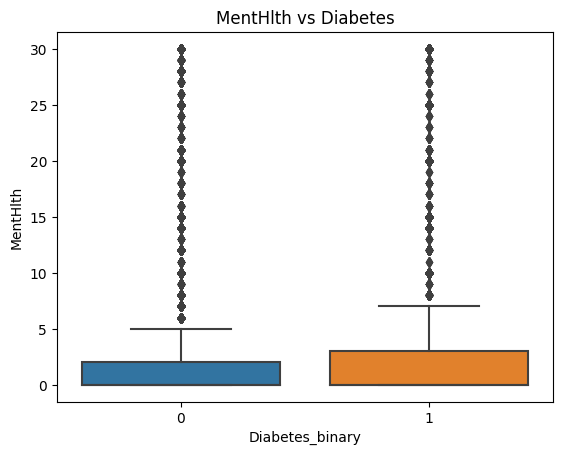

In [19]:
sns.boxplot(x = 'Diabetes_binary', y = 'MentHlth', data = df)
plt.title('MentHlth vs Diabetes')
plt.show()

The interpretation of the provided box plot visualization indicates the following:

1. **Outliers:** Both diabetic and non-diabetic groups exhibit numerous outlier data points. These outliers represent MentHlth (number of days with poor mental health) values that significantly deviate from the rest of the data distribution. The presence of many outliers suggests a wide variation in the number of days with poor mental health among individuals in both groups.

2. **Absence of Median Line:** The absence of a visible median line within the box plot suggests that the median value for MentHlth falls outside the range of data plotted. This could be due to extreme values or the presence of a highly skewed distribution. Without a clear median line, it becomes challenging to identify the central tendency of the data for both diabetic and non-diabetic groups.

3. **Limited Range Display:** The box plot only displays the upper quartile (Q3) and maximum (Q4) range of MentHlth values for both diabetic and non-diabetic groups. There is no indication of the minimum (Q1) or lower quartile (Q2) range in the visualization.

Overall, the box plot highlights the substantial variability in the number of days with poor mental health among individuals in both diabetic and non-diabetic groups, but it does not provide clear insights into the central tendency or full range of MentHlth values due to the presence of outliers and the absence of a visible median line.

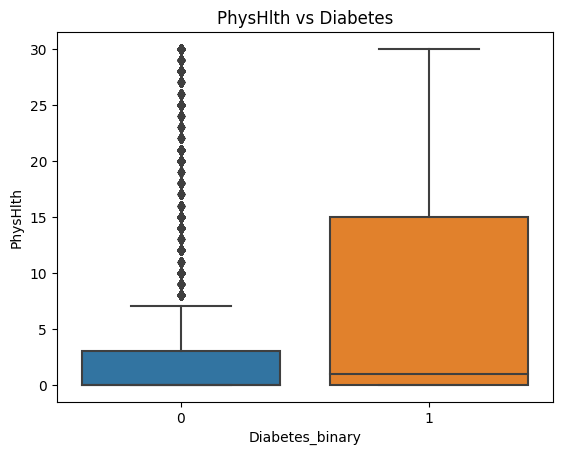

In [20]:
sns.boxplot(x = 'Diabetes_binary', y = 'PhysHlth', data = df)
plt.title('PhysHlth vs Diabetes')
plt.show()

The interpretation of the provided box plot visualization is as follows:

1. **Non-diabetic Group:**
   - The non-diabetic group exhibits extreme outlier values for PhysHlth (number of days with poor physical health) without a visible minimum (Q1) point. These outlier values suggest a subset of individuals experiencing a significantly higher number of days with poor physical health compared to the rest of the group.
   - Despite the presence of outliers, the box plot does not show the lower quartile (Q1) range, which could indicate that the majority of non-diabetic individuals experience relatively fewer days with poor physical health.

2. **Diabetic Group:**
   - In contrast, the diabetic group does not have any visible outliers. The absence of outlier data points suggests a more consistent distribution of PhysHlth values among diabetic individuals.
   - The box plot for the diabetic group depicts a larger box size, indicating a wider interquartile range (IQR) compared to the non-diabetic group. This suggests greater variability in the number of days with poor physical health among diabetic individuals.
   - Additionally, the median line is positioned closer to the lower range of values, indicating that the central tendency of PhysHlth values for diabetic individuals is lower compared to the non-diabetic group.

Overall, the box plot illustrates differences in the distribution of PhysHlth values between diabetic and non-diabetic groups, with the non-diabetic group showing extreme outliers and variability skewed towards higher values, while the diabetic group exhibits a more consistent distribution with a lower central tendency.

## Univariate and bivariate analysis to explore relationships between variables.


#### Visualization of [Yes-No] columns and their relation with the target 

In [21]:
binary_cols = [col for col in df.columns if df[col].value_counts().shape[0] == 2 and col not in ['Diabetes_binary', 'Diabetes_binary_str']] 
print('The yes no variables in this data set:')
print(binary_cols)

The yes no variables in this data set:
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


## Diabetic Characteristics by Past Medical Conditions

### Method: visualize_diabetic_characteristics

This method creates a grid of subplots to visualize the relationship between binary variables (representing past medical conditions) and the presence of diabetes in a dataset. It includes both countplots and point plots to show the distribution of diabetic and non-diabetic cases for each binary variable, as well as the proportion of diabetic cases within each category of the variable.

#### Use Case:
- Exploring how different past medical conditions relate to the likelihood of having diabetes.
- Identifying potential risk factors or patterns associated with diabetes.

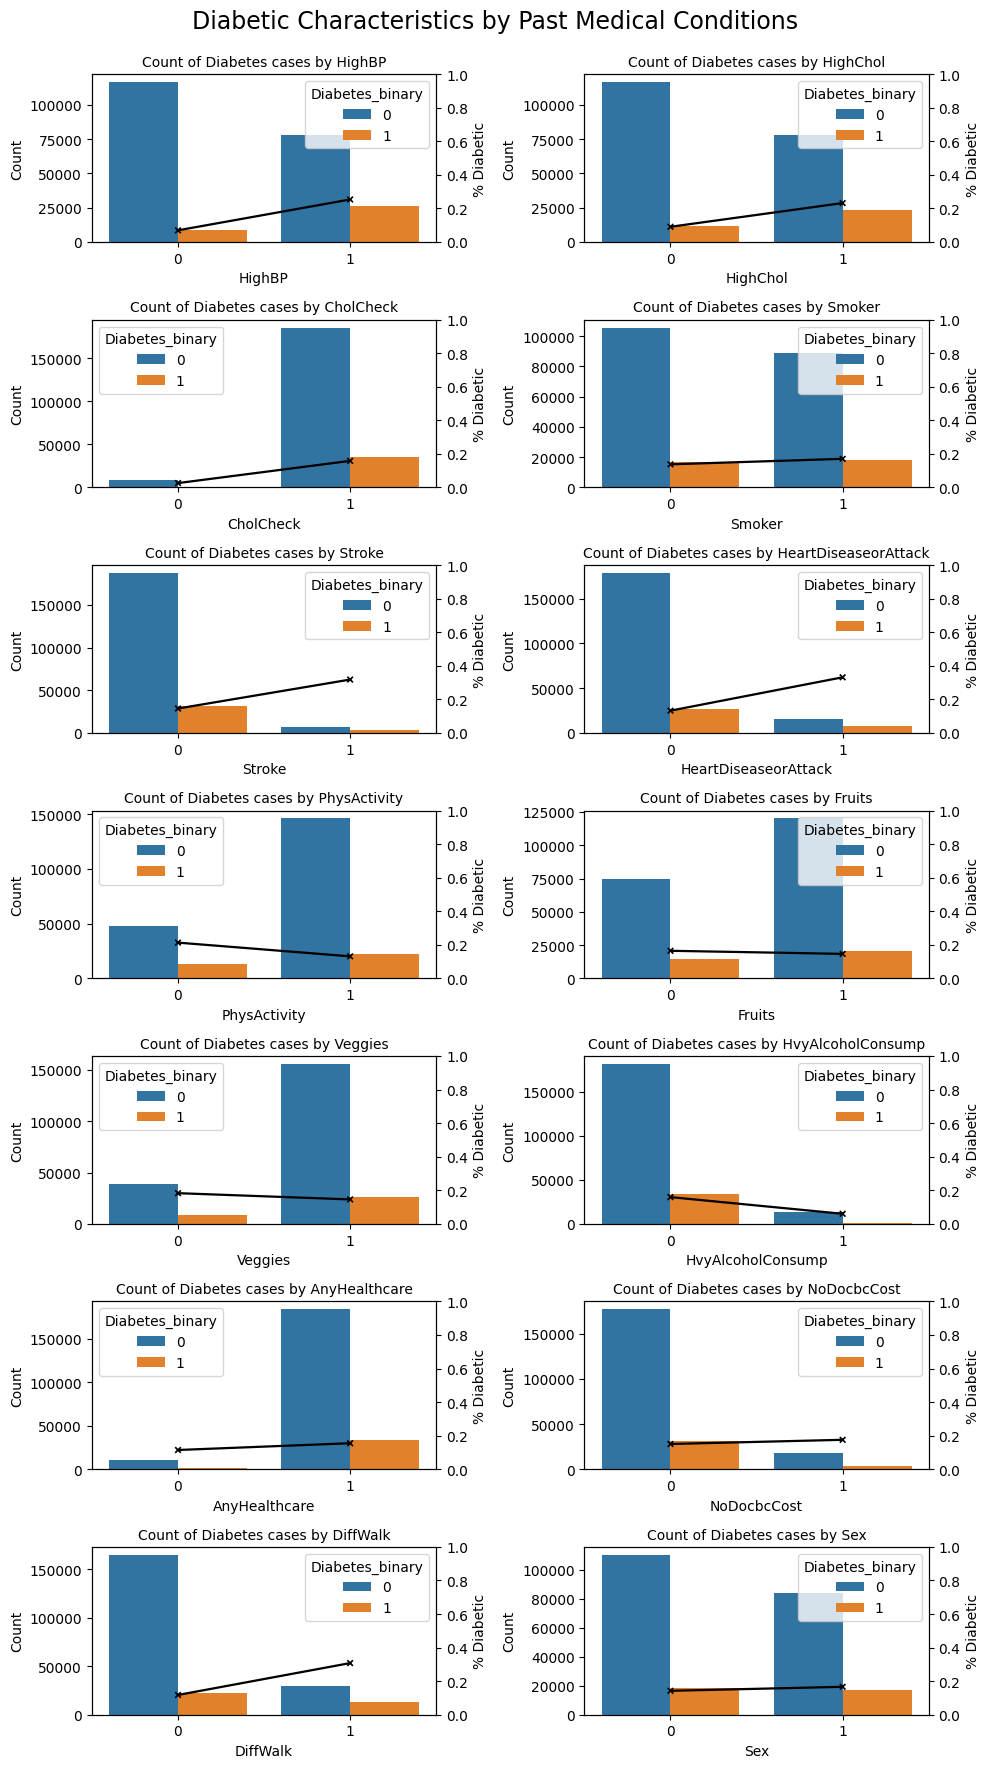

In [22]:
fig, axes = plt.subplots(7, 2, figsize=(10, 18))
fig.suptitle("Diabetic Characteristics by Past Medical Conditions\n", fontsize=17)


for i, var in enumerate(binary_cols):
    ax = axes[i//2][i%2]
    sns.countplot(x=var, hue="Diabetes_binary", data=df, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_title("Count of Diabetes cases by "+var,fontdict={"fontsize": 10})
    ax2=ax.twinx()
    ax2 = sns.pointplot(x=var, y="Diabetes_binary", data=df.groupby(var).mean().reset_index(),color='black',markers='x',scale=0.6, ax=ax2)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% Diabetic", color='black')
plt.tight_layout()
plt.show()

#### Key Insights:

* There is a noticeable increase in diabetic risk among individuals with high blood pressure and high cholesterol levels.
* Cholesterol check seems to be associated with a higher risk of diabetes.
* Smoking does not appear to significantly increase the risk of diabetes according to the data.
* A history of stroke and heart diseases indicates a greater likelihood of being diabetic.
* Heart disease attacks are more likely to occur in individuals with diabetes.
* People who engage in regular physical activity and consume fruits and vegetables daily appear to have a lower risk of diabetes, based on the data.
* The cost of doctor visits and access to healthcare do not seem to affect the likelihood of diabetes.
* Individuals who have difficulty walking are more likely to have diabetes.
* Gender does not appear to influence the likelihood of diabetes.

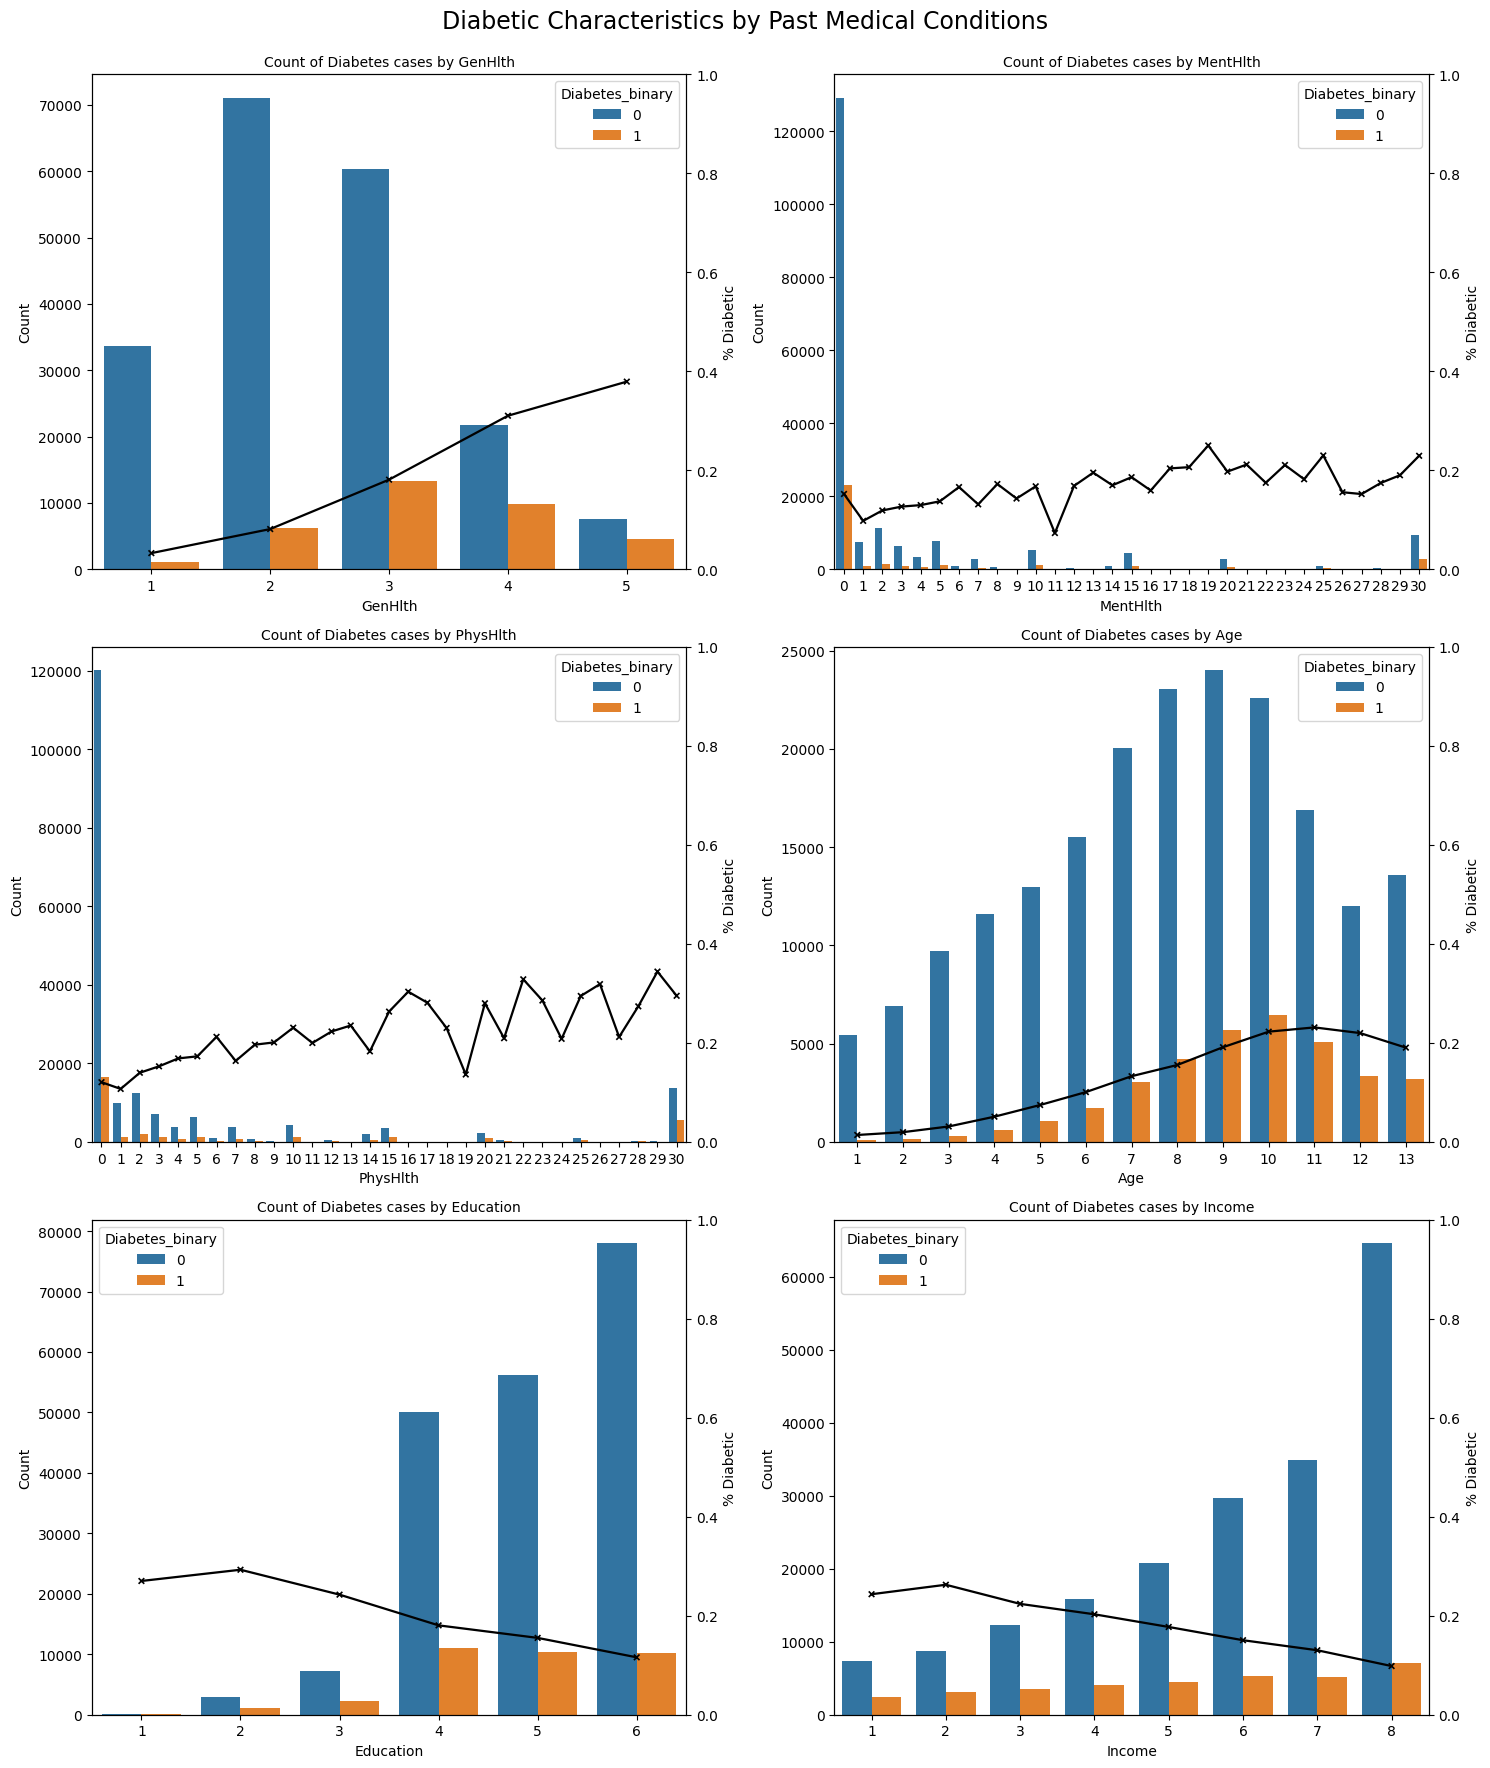

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle("Diabetic Characteristics by Past Medical Conditions\n", fontsize=17)

discrete_var = [col for col in df.columns[1:] if col not in binary_cols]
for i, var in enumerate(discrete_var[1:]):
    ax = axes[i//2][i%2]
    sns.countplot(x=var, hue="Diabetes_binary", data=df, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_title("Count of Diabetes cases by "+var,fontdict={"fontsize": 10})
    ax2=ax.twinx()
    ax2 = sns.pointplot(x=var, y="Diabetes_binary", data=df.groupby(var).mean().reset_index(),color='black',markers='x',scale=0.6, ax=ax2)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% Diabetic", color='black')
plt.tight_layout()
plt.show()

#### Key Insights:
* People who has unhealthy likely to increase risk of diabetics.
* Increasing day of the past of stress or unhealthy mental has higher risk of diabetic.
* Data tells that increasing age have higher risk of diabetes.
* People with higher education, income are found to be on lower risk
* People who are physically active, eats fruits veggies everyday are found to be on lower risk according to data.

#### The feature "BMI" and it's relation with the target 

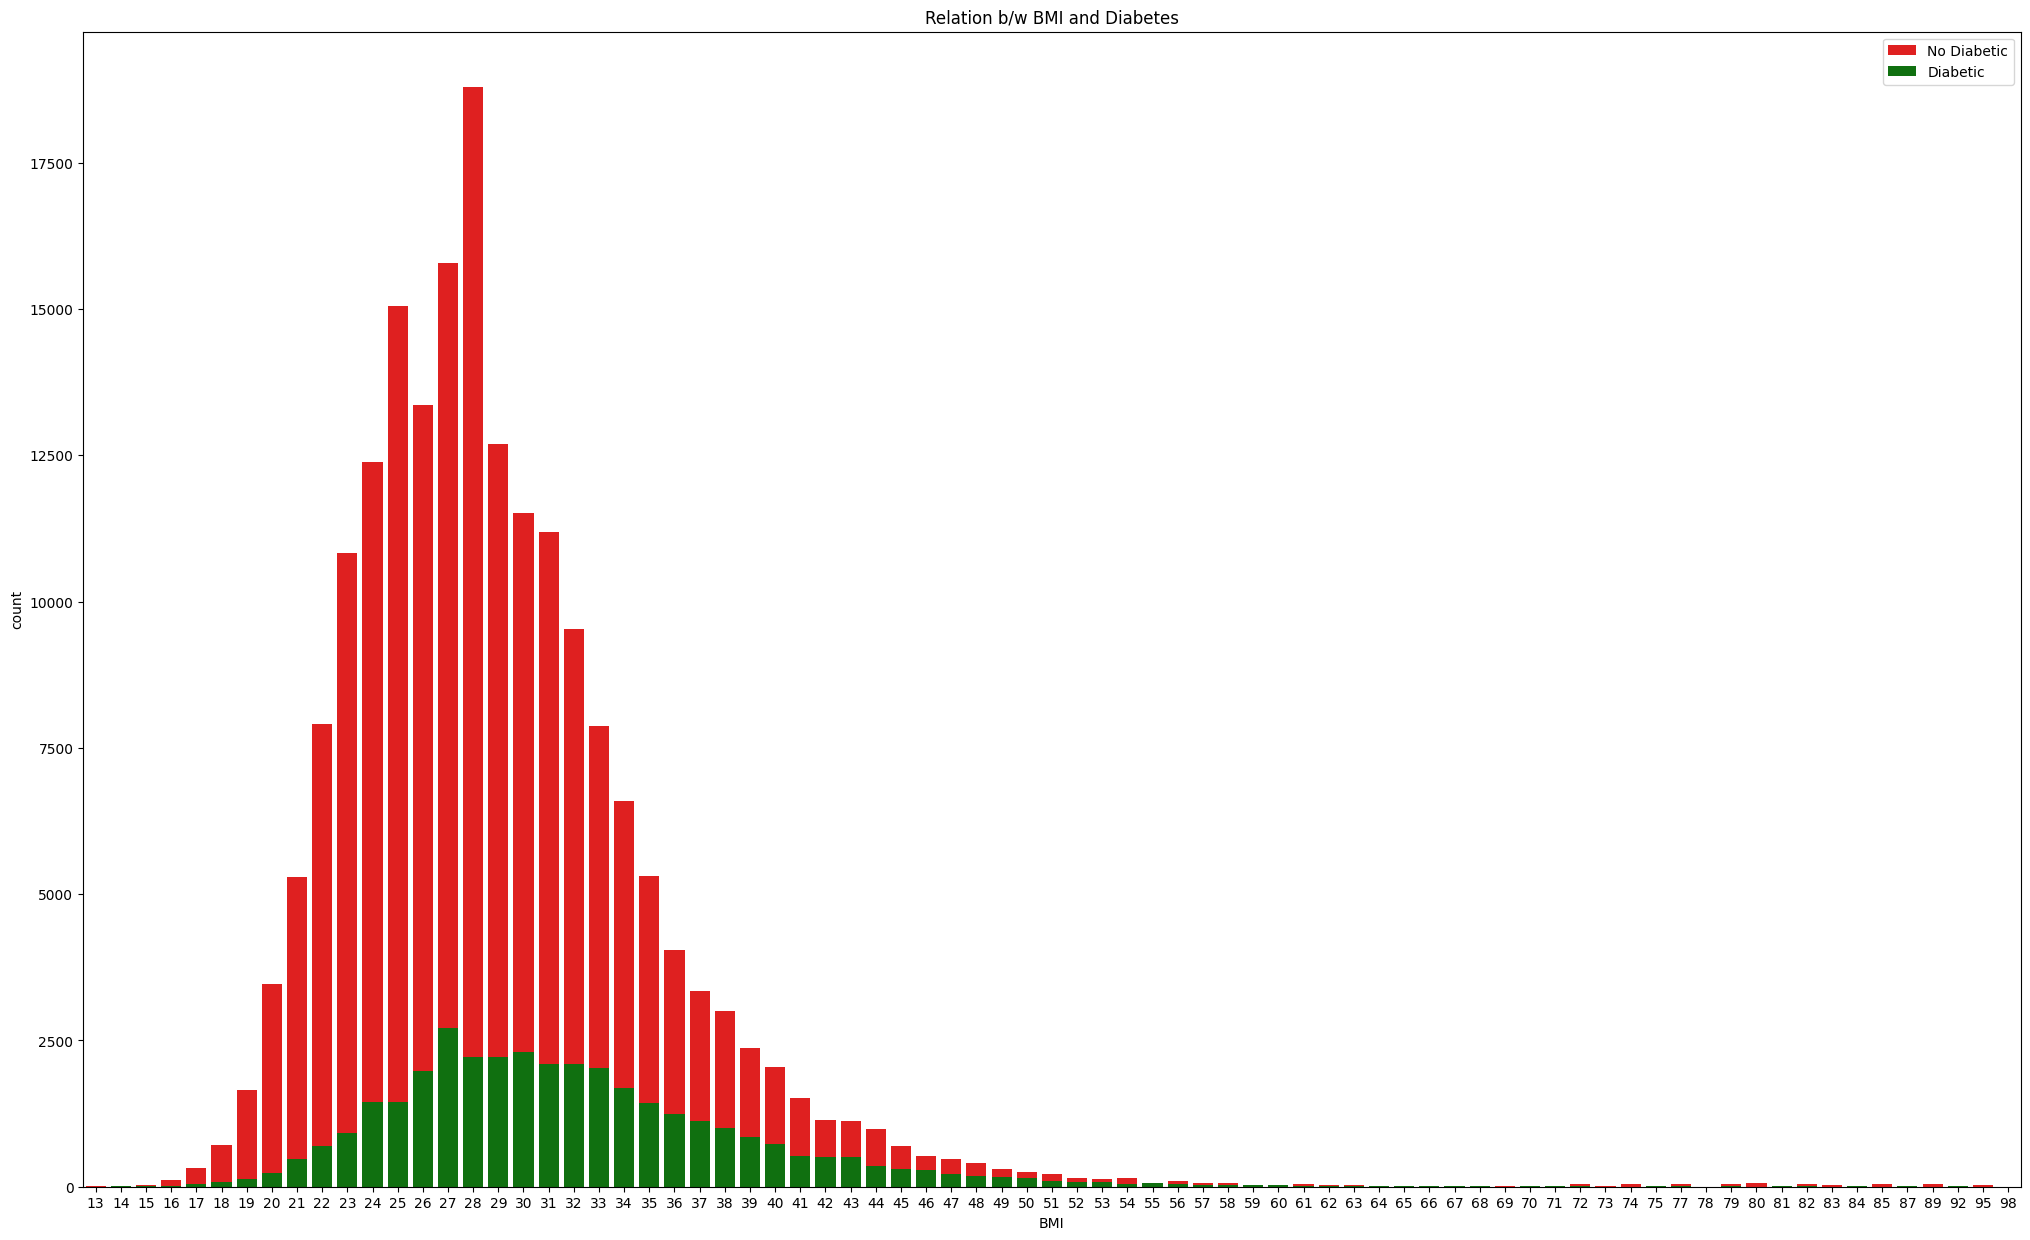

In [24]:
# Count plot to see number of Diabetic and non Diabetic patient of Group two BMI

plt.figure(figsize=(25, 15))

sns.countplot(x = df.BMI[df.Diabetes_binary == 0], color="r", label="No Diabetic")
sns.countplot(x = df.BMI[df.Diabetes_binary == 1], color="g", label="Diabetic")
plt.title("Relation b/w BMI and Diabetes")

plt.legend();

As we can see people range between 24-33 BMI have more likely have Diabetic.

#### The feature "MentHlth" and it's relation with the target 

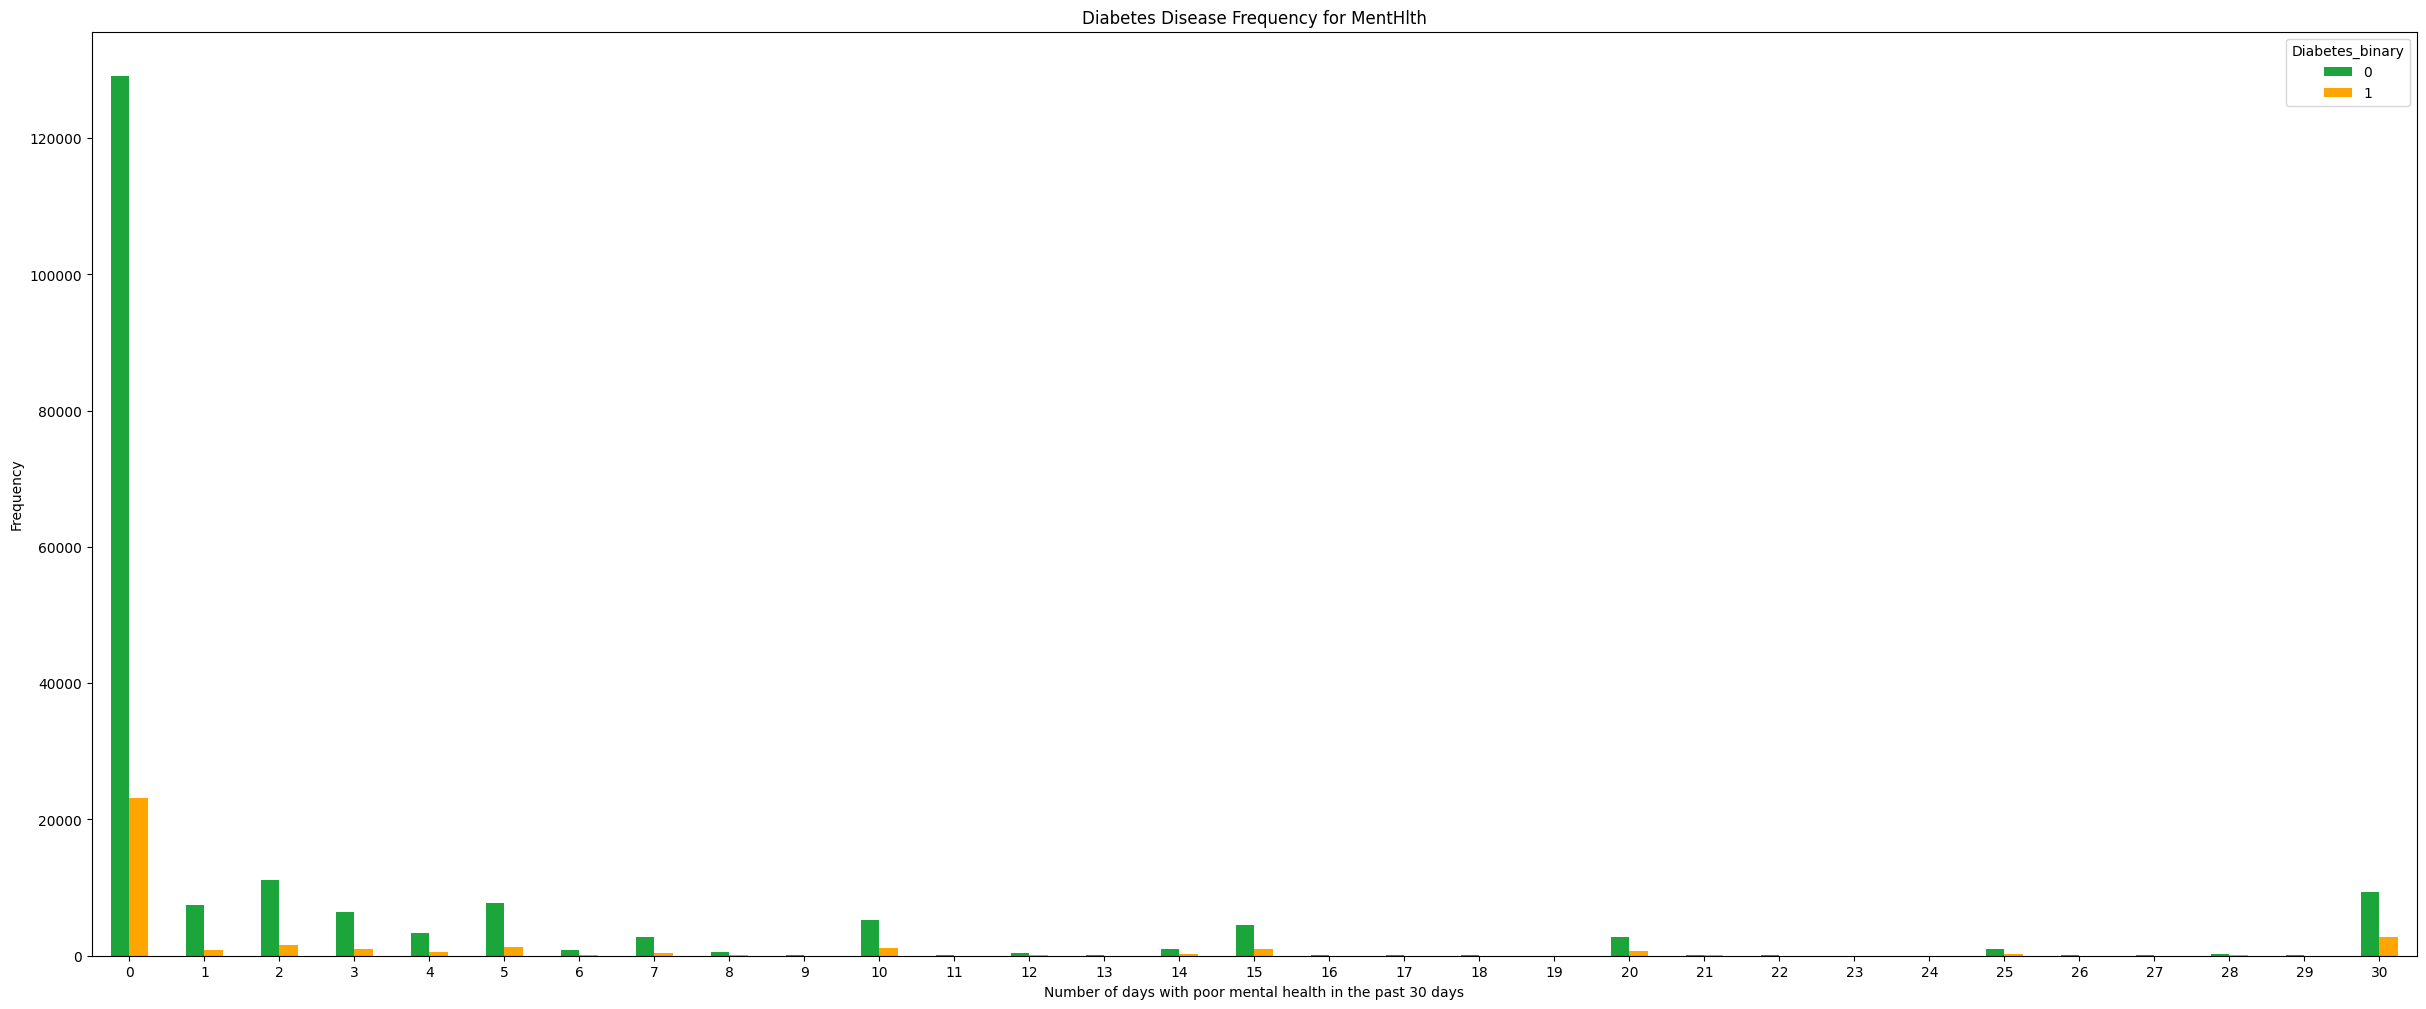

In [25]:
cross_table_MentHlth = pd.crosstab(df.MentHlth, df.Diabetes_binary)
cross_table_MentHlth.plot(kind ='bar', figsize=(30, 12), color = ['#1CA53B', '#FFA500'])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('Number of days with poor mental health in the past 30 days')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

#### The feature "PhysHlth"and it's relation with the target

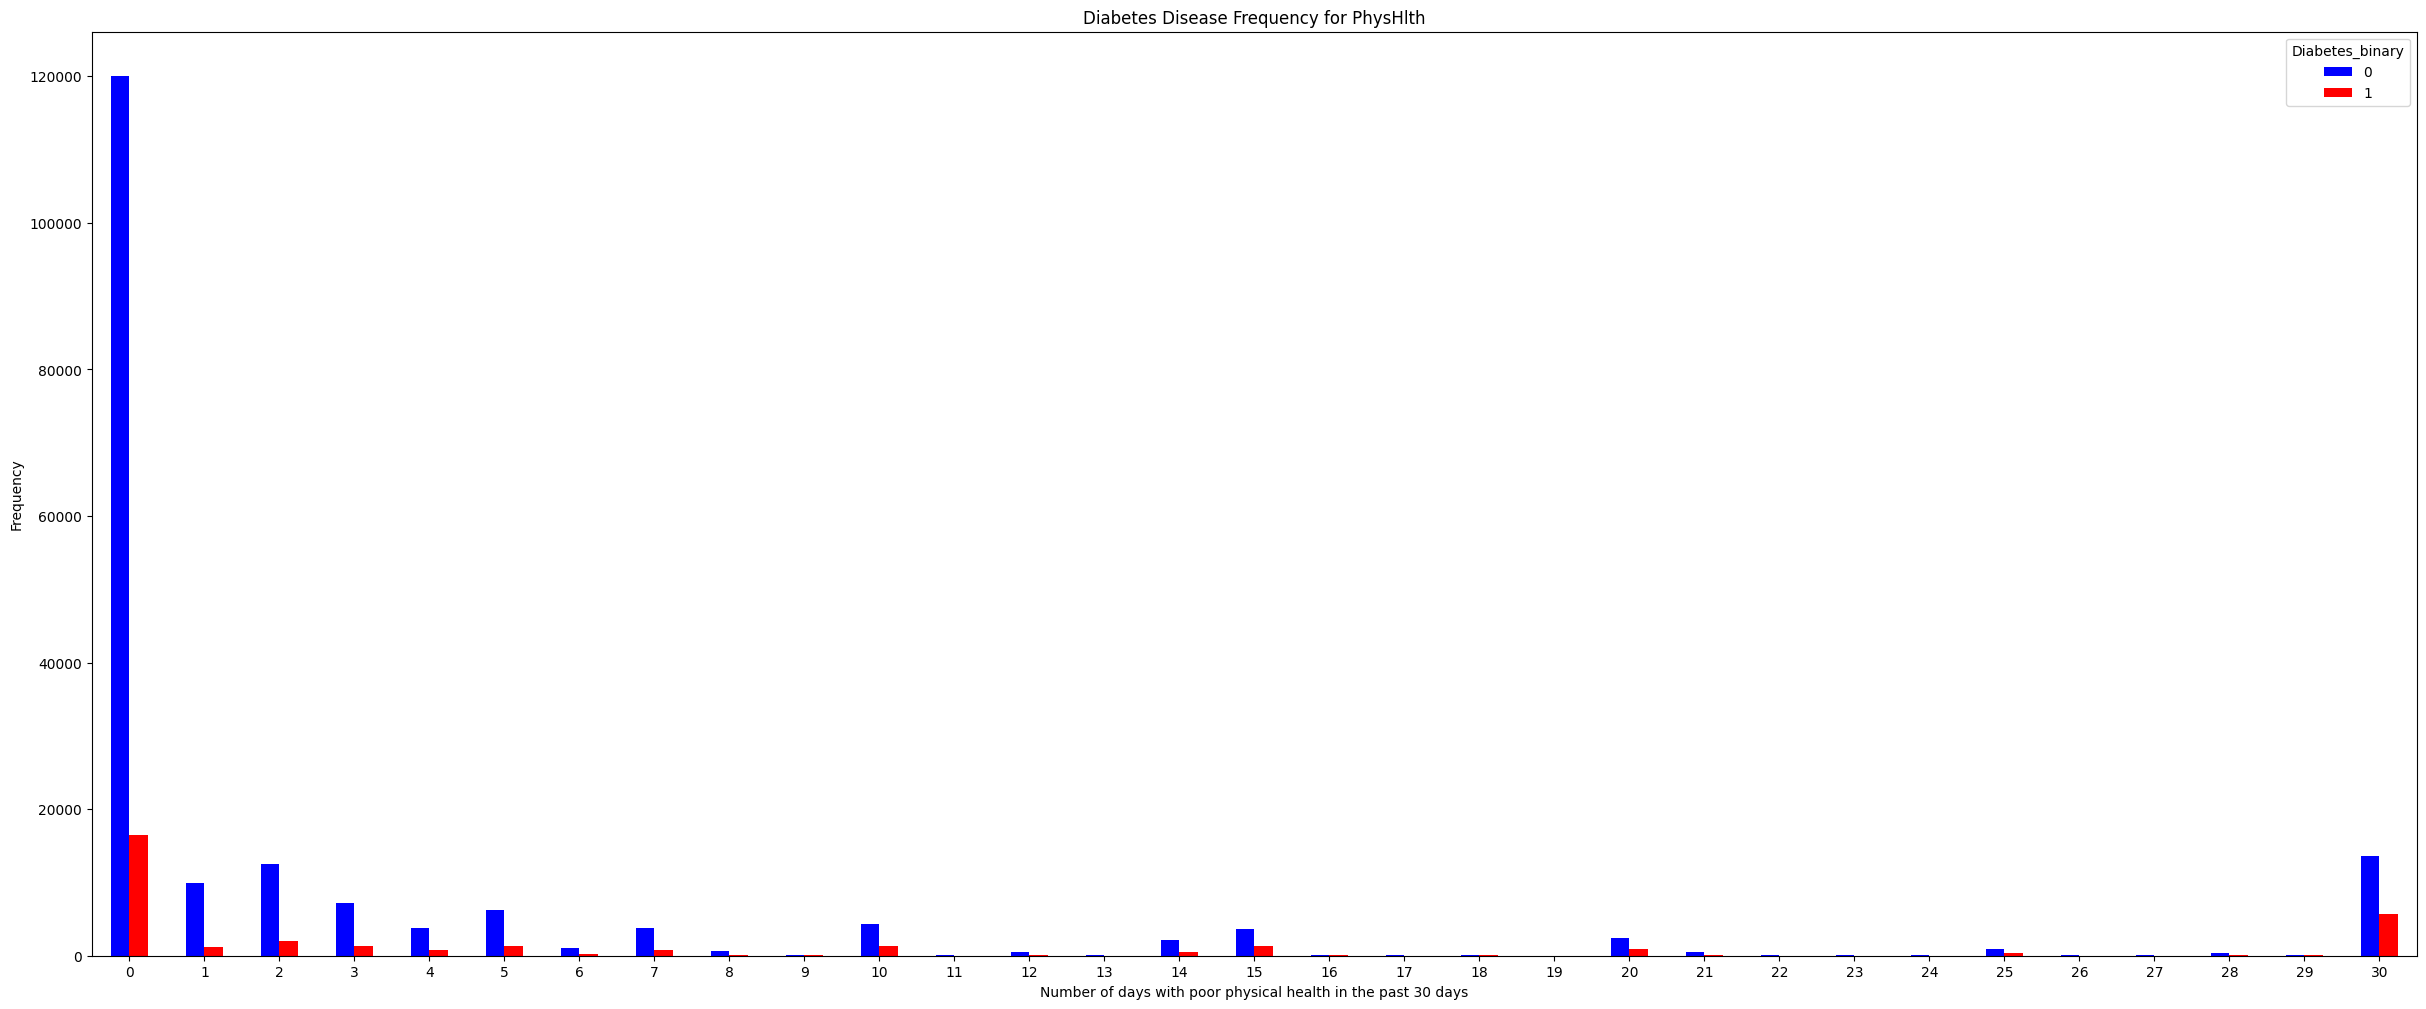

In [26]:
cross_table_PhysHlth = pd.crosstab(df.PhysHlth, df.Diabetes_binary)
cross_table_PhysHlth.plot(kind = 'bar', figsize = (30, 12),  color = ['Blue', 'Red'])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('Number of days with poor physical health in the past 30 days')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

#### The feature "GenHlth" and it's relation with the target

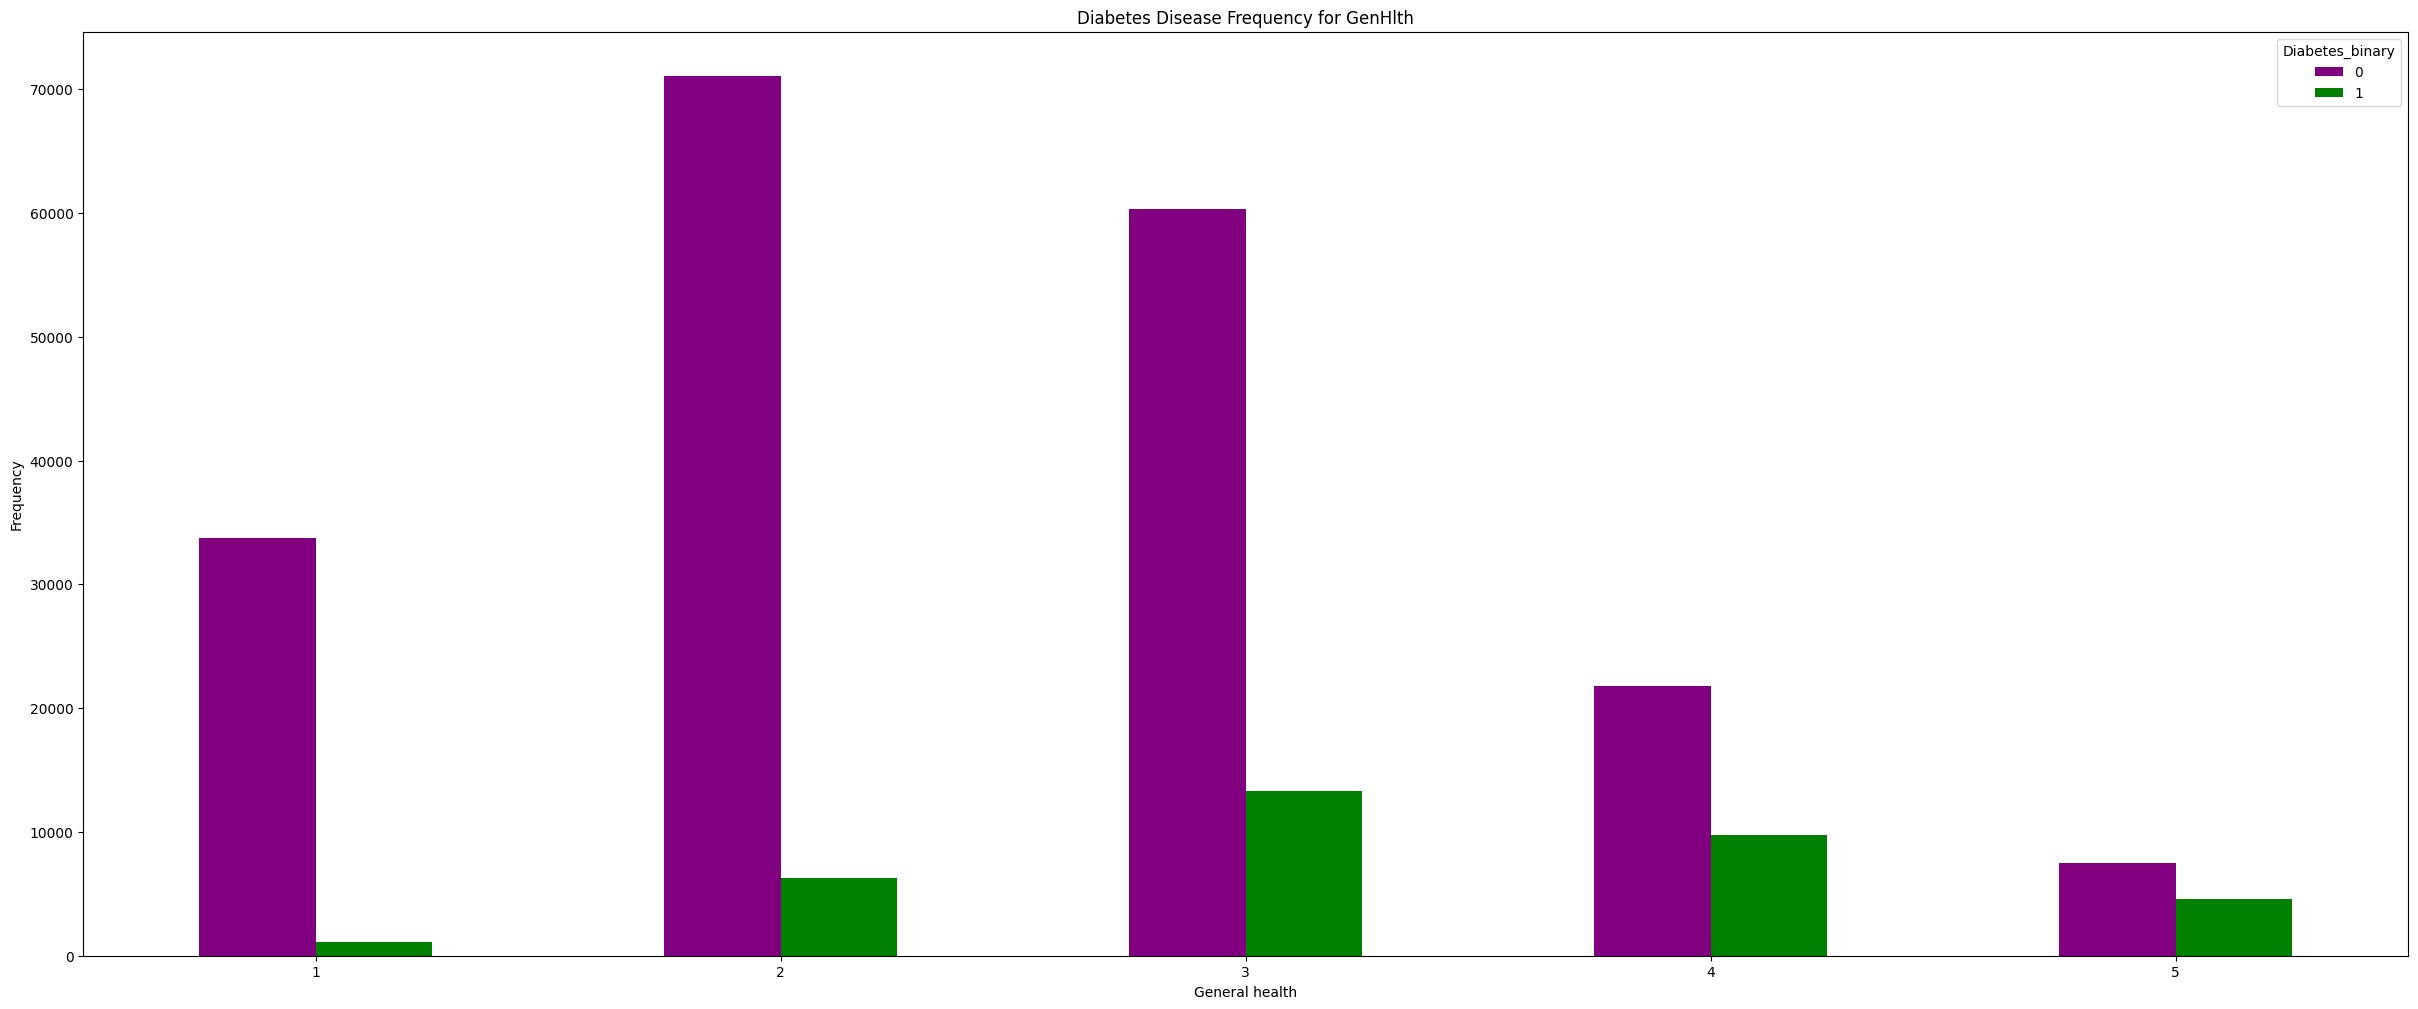

In [27]:
cross_table_GenHlth = pd.crosstab(df.GenHlth, df.Diabetes_binary)
cross_table_GenHlth.plot(kind = 'bar', figsize = (30, 12), color = ['Purple', 'Green'])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('General health')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth ,but they have diabetes !!!

## Assessment of Statistical Significance and Association

An association rule is statistically significant, if it has a small probability to occur by chance. It is well-known that the traditional frequency-confidence framework does not produce statistically significant rules.

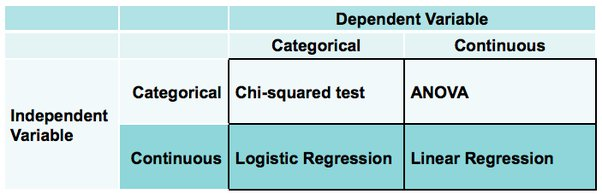

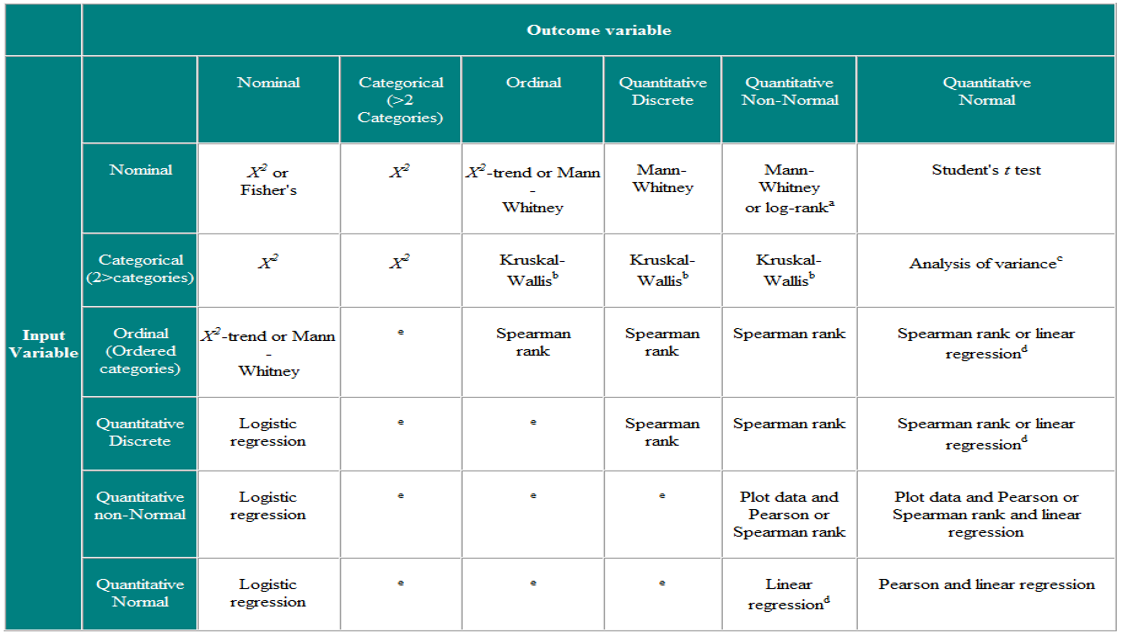

### Data Spliting 

In [28]:
input_variables = df.drop(columns=['Diabetes_binary'])
Ouput_variable = df.Diabetes_binary

## Contingency Table (Cross-tabulation)

A contingency table is a method of organizing data that has more than one variable to make it easier to understand.

In [29]:
# Assuming df is your DataFrame containing the categorical variables
cross_tab = pd.crosstab(index=[df[col] for col in input_variables.columns], columns=Ouput_variable)
cross_tab

Diabetes_binary                                                                                                                                                                                       0  \
HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income      
0      0        0         14  1      0      0                    1            1      1       0                 1             0           3       4        4        0        1   11  6         8       1   
                          15  0      0      0                    0            1      0       0                 0             0           1       0        0        0        0   1   5         7       1   
                              1      0      0                    0            0      0       0                 1             0           5       20       28       1        0   10  6         4       1   
                                            1                    0            1      1       0                 0             1           3       0        29       0        0   7   5         2       1   
                          16  0      0      0                    0            0      0       0                 1             0           2       0        0        0        0   11  5         5       1   
...                                                                                                                                                                                                  ..   
1      1        1         95  1      0      0                    0            1      1       0                 1             0           5       15       30       1        0   6   4         2       1   
                          98  0      0      0                    1            1      1       0                 1             0           3       4        0        1        0   10  4         6       1   
                                     1      0                    0            0      1       0                 1             0           2       0        0        0        0   13  5         8       1   
                              1      0      1                    0            1      1       0                 1             0           5       30       30       1        0   8   6         5       0   
                                     1      1                    0            1      1       0                 1             0           4       15       10       1        0   11  5         6       0   

Diabetes_binary                                                                                                                                                                                       1  
HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income     
0      0        0         14  1      0      0                    1            1      1       0                 1             0           3       4        4        0        1   11  6         8       0  
                          15  0      0      0                    0            1      0       0                 0             0           1       0        0        0        0   1   5         7       0  
                              1      0      0                    0            0      0       0                 1             0           5       20       28       1        0   10  6         4       0  
                                            1                    0            1      1       0                 0             1           3       0        29       0        0   7   5         2       0  
                          16  0      0      0                    0            0      0       0                 1             0           2       0  

In [30]:
cross_tab.head()

Diabetes_binary                                                                                                                                                                                       0  \
HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income      
0      0        0         14  1      0      0                    1            1      1       0                 1             0           3       4        4        0        1   11  6         8       1   
                          15  0      0      0                    0            1      0       0                 0             0           1       0        0        0        0   1   5         7       1   
                              1      0      0                    0            0      0       0                 1             0           5       20       28       1        0   10  6         4       1   
                                            1                    0            1      1       0                 0             1           3       0        29       0        0   7   5         2       1   
                          16  0      0      0                    0            0      0       0                 1             0           2       0        0        0        0   11  5         5       1   

Diabetes_binary                                                                                                                                                                                       1  
HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income     
0      0        0         14  1      0      0                    1            1      1       0                 1             0           3       4        4        0        1   11  6         8       0  
                          15  0      0      0                    0            1      0       0                 0             0           1       0        0        0        0   1   5         7       0  
                              1      0      0                    0            0      0       0                 1             0           5       20       28       1        0   10  6         4       0  
                                            1                    0            1      1       0                 0             1           3       0        29       0        0   7   5         2       0  
                          16  0      0      0                    0            0      0       0                 1             0           2       0        0        0        0   11  5         5       0

## Chi-Square Test of Independence

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

**Null hypothesis:** We start by defining our null hypothesis (H0) which states that there is no relation between the variables. 

**Alternate hypothesis:** It would state that there is a significant relationship between the two variables. 

In [31]:
input_col = input_variables.columns

def chi_sqaure_test(input_col):
    # Create the cross-tabulation
    cross_tab = pd.crosstab(index=[df[col] for col in input_col], columns=df['Diabetes_binary'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # Interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [32]:
chi_sqaure_test(input_col.tolist())

p value is 0.9999999999875481
Independent (H0 holds true)


In [33]:
# Initialize an empty dictionary to store chi-square statistics, p-values, and hypothesis testing results for each variable
results = {}

# Iterate over each input variable and compute the chi-square statistic, p-value, and perform hypothesis testing
for col in input_variables.columns:
    cross_tab = pd.crosstab(index=df[col], columns=df['Diabetes_binary'])
    chi2, p_value, dof, expected = chi2_contingency(cross_tab)
    
    # Check if p-value is less than alpha (e.g., 0.05) for significance
    alpha = 0.05
    if p_value <= alpha:
        hypothesis = "Reject H0"
    else:
        hypothesis = "Fail to reject H0"
    
    results[col] = {"Chi-square": chi2, "P-value": p_value, "Hypothesis": hypothesis}

# Sort the results dictionary by chi-square values in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1]["Chi-square"], reverse=True)

# Print the sorted results along with hypothesis testing outcome
for i, (col, result) in enumerate(sorted_results):
    print(f"{i}. {col}: Chi-square = {result['Chi-square']}, P-value = {result['P-value']}, {result['Hypothesis']}")

0. GenHlth: Chi-square = 18193.703885350526, P-value = 0.0, Reject H0
1. HighBP: Chi-square = 14840.421805278642, P-value = 0.0, Reject H0
2. BMI: Chi-square = 12022.379031102457, P-value = 0.0, Reject H0
3. DiffWalk: Chi-square = 9670.630180157525, P-value = 0.0, Reject H0
4. HighChol: Chi-square = 8719.656977878742, P-value = 0.0, Reject H0
5. Age: Chi-square = 8207.83159010538, P-value = 0.0, Reject H0
6. HeartDiseaseorAttack: Chi-square = 6491.585744746344, P-value = 0.0, Reject H0
7. PhysHlth: Chi-square = 6010.90602529471, P-value = 0.0, Reject H0
8. Income: Chi-square = 4637.195742032824, P-value = 0.0, Reject H0
9. Education: Chi-square = 2508.4053620030304, P-value = 0.0, Reject H0
10. PhysActivity: Chi-square = 2312.7036940053667, P-value = 0.0, Reject H0
11. Stroke: Chi-square = 2256.534054854552, P-value = 0.0, Reject H0
12. CholCheck: Chi-square = 1205.9291267293381, P-value = 3.1386083621362587e-264, Reject H0
13. MentHlth: Chi-square = 1121.4857334012136, P-value = 1.060

In [34]:
# Initialize variables to store the maximum number of input features and corresponding p-value
max_num_features_accepted = 0
max_p_value_accepted = 0
selected_features_accepted = []

# Iterate over increasing numbers of input features
for num_features in range(1, len(input_variables.columns) + 1):
    # Initialize an empty list to store input features for this iteration
    selected_features = []
    
    # Iterate over input features and select num_features
    for col in input_variables.columns:
        # Include the feature if it's not already selected and not exceeding the desired number of features
        if col not in selected_features and len(selected_features) < num_features:
            selected_features.append(col)
            
            # Create cross-tabulation for selected features
            cross_tab = pd.crosstab(index=[df[col] for col in selected_features], columns=df['Diabetes_binary'])
            chi2, p_value, _, _ = chi2_contingency(cross_tab)
            
            # If p-value is significant, update the maximum number of features and corresponding p-value
            if p_value <= 0.05:
                max_num_features_accepted = num_features-1
                max_p_value_accepted = p_value
                selected_features_accepted = selected_features.copy()

# Print the maximum number of input features and corresponding p-value
print("Maximum Number of Input Features Accepted under H1:", max_num_features_accepted)
print("Corresponding p-value:", max_p_value_accepted)
print("Selected Features:", selected_features_accepted)
print("Excluded Features:", [i for i in input_variables.columns if i not in selected_features_accepted])

Maximum Number of Input Features Accepted under H1: 20
Corresponding p-value: 2.0299200808884095e-11
Selected Features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education']
Excluded Features: ['Income']


## 5 Simple Steps to Choose the Best Machine Learning Algorithm That Fits Your AI Project Needs

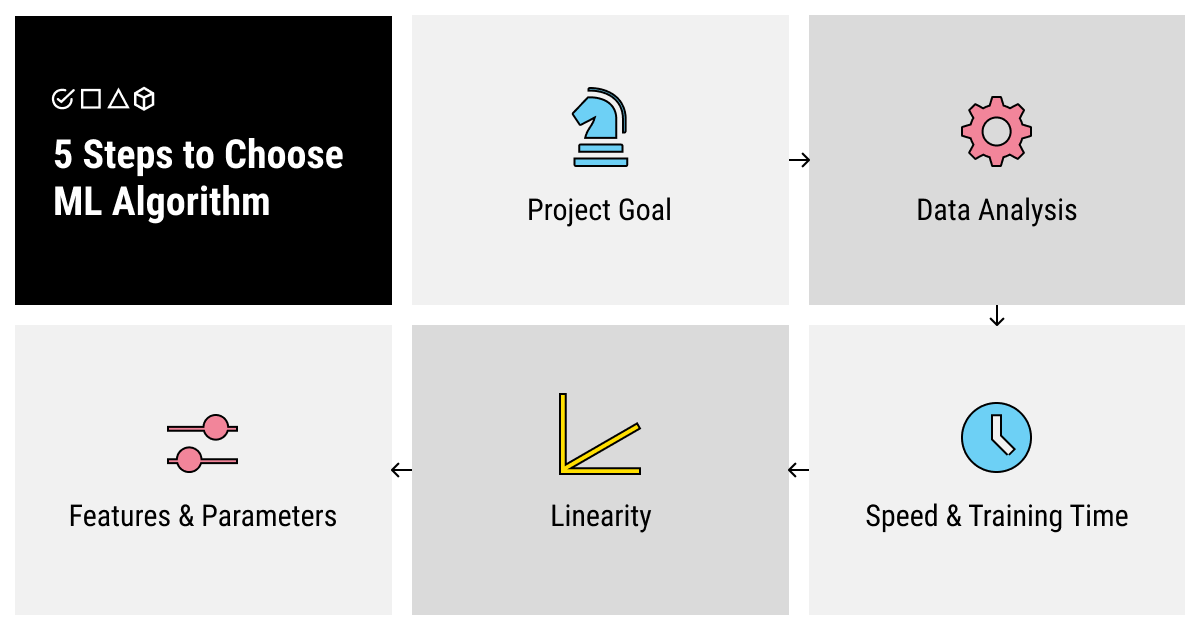

# **Model Recommendations:**
Based on the dataset characteristics and project goals, the following machine learning models are recommended for initial exploration:

1. **Logistic Regression**:
   - **Suitability**: Ideal for binary classification tasks with categorical predictors.
   - **Strengths**: Provides interpretable results, handles categorical data efficiently, and offers insights into feature importance.
   - **Recommendation**: Logistic regression serves as a baseline model, offering simplicity and interpretability. It will help identify significant risk factors associated with diabetes.

2. **Decision Trees**:
   - **Suitability**: Effective for capturing complex relationships and interactions between categorical predictors and the outcome variable.
   - **Strengths**: Handles nonlinear relationships well and provides clear feature importance.
   - **Recommendation**: Decision trees offer flexibility and can uncover patterns in the data. They will help identify key survey questions influencing diabetes risk.

3. **Naive Bayes**:
   - **Suitability**: Suitable for classification tasks with categorical predictors, assuming feature independence.
   - **Strengths**: Simple and efficient, especially with large datasets.
   - **Recommendation**: Naive Bayes provides a probabilistic approach to classification. While its assumption of feature independence may not hold strictly, it can offer insights into conditional probabilities.

4. **Random Forest**:
   - **Suitability**: Robust to noise, overfitting, and handles complex relationships in the data.
   - **Strengths**: Provides high predictive performance, handles categorical data effectively, and requires minimal preprocessing.
   - **Recommendation**: Random forests are versatile and powerful, offering insights into feature importance and capturing intricate patterns in the data.

**Conclusion:**
Exploring logistic regression, decision trees, naive Bayes, and random forests as initial models for diabetes prediction offers a comprehensive approach. These models will help gain insights into the relationship between survey responses and diabetes risk, guiding further analysis and model refinement.

**Next Steps:**
1. Implement the recommended models on the dataset.
2. Evaluate model performance using appropriate metrics such as accuracy, precision, recall, and ROC-AUC.
3. Interpret model results to identify significant risk factors associated with diabetes.
4. Explore additional modeling techniques and feature engineering strategies to improve predictive performance.
5. Iterate on model development and validation to refine the diabetes prediction model.

# Result 

* No missing values were found in the dataset.
* Although some outliers were detected, they were retained for this analysis as they represent true values.
* Individuals with unhealthy lifestyles are more likely to develop diabetes.
* An increase in the number of days of past stress or unhealthy mental states is associated with a higher risk of diabetes.
* The data indicates that advancing age correlates with a higher risk of diabetes.
* Individuals with higher levels of education and income appear to have a lower risk of diabetes.
* Regular physical activity and consumption of fruits and vegetables are associated with a lower risk of diabetes.
* There is a noticeable increase in the risk of diabetes among individuals with high blood pressure and high cholesterol levels.
* Cholesterol checks seem to be associated with a higher risk of diabetes.
* Smoking does not significantly increase the risk of diabetes according to the data.
* A history of stroke and heart diseases indicates a greater likelihood of diabetes.
* Heart disease attacks are more likely to occur in individuals with diabetes.
* Individuals who engage in regular physical activity and consume fruits and vegetables daily appear to have a lower risk of diabetes.
* The cost of doctor visits and access to healthcare do not appear to affect the likelihood of diabetes.
* Individuals who have difficulty walking are more likely to have diabetes.
* Gender does not appear to influence the likelihood of diabetes.
* Individuals with a BMI ranging between 24-33 are more likely to have diabetes.
* The Mental Health Group (MentHlth) with scores ranging from 0 to 5 appears to impact the likelihood of diabetes.
* Similarly, the Physical Health Group (PhysHlth) with scores ranging from 0 to 5 appears to influence the likelihood of diabetes.
* The low p-values obtained for all tested variables indicate a rejection of the null hypothesis (H0) of independence.
* Therefore, we conclude that there is a significant relationship between diabetes and each of the tested variables.
* The selected features for further analysis include: HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, and Education.
* The variable Income is excluded from further analysis due to its lack of statistical significance.


In [36]:
# Save final data
df.drop(columns=['Income']).to_csv('final_diabetes_dataset.csv', index=False)

# Refferals 

1. [Data source: Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
2. [Data Visualization](https://www.kaggle.com/code/ayushnitb/model-interpretation-using-shap-in-2023#Data-Dictionary:)
3. [Relationship Testing (Chi-Square)](https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7)
4. [Implementation of Chi-Square](https://www.geeksforgeeks.org/python-pearsons-chi-square-test/)
5. [Course on Coursera](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning?specialization=ibm-machine-learning)
6. [Contingency Table](https://datatab.net/tutorial/cross-table)
7. [Imabalances](https://www.turintech.ai/what-is-imbalanced-data-and-how-to-handle-it/)
8. [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
9. [Tour of Evaluation Metrics for Imbalanced Classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
10. [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
11. [How to Choose the Right Machine Learning Algorithm: A Pragmatic Approach](https://labelyourdata.com/articles/how-to-choose-a-machine-learning-algorithm)
12. [Traditional and emerging risk factors that explain the increased risk of adverse events in patients with HF and associated diabetes](https://www.researchgate.net/figure/Traditional-and-emerging-risk-factors-that-explain-the-increased-risk-of-adverse-events_fig1_360426066)